In [1]:
'''
Coding: PYTHON UTF-8
Created On: 2023-08-07 14:52:10
Author: Putu Hendra Widyadharma
=== plot bootstrap data as horizontal plot (lon,lat) with ellipse error
'''

import numpy as np
import pandas as pd
import pygmt 
import glob
from tkinter import Tcl
from pathlib import Path

In [2]:
path = 'G:\\My Drive\\Tomography\\040823\\bootstrp-result-sul-13042023-04082023\\output\\'
minlon, maxlon = 118,127
minlat, maxlat = -7,5

In [3]:
# searching data in folder
files = glob.glob(path+'*.reloc')
files = Tcl().call('lsort', '-dict', files)
print(f'found {len(files)} file(s)')
# end of searching data in folder

found 50 file(s)


In [4]:
# projection initialization
proj_lon = pygmt.project(
                     center=f'{minlon}/{minlat+(maxlat-minlat)/2}',
                     endpoint=f'{maxlon}/{minlat+(maxlat-minlat)/2}',
                     unit=True,
                     generate='0.1')
region_length_max = round(proj_lon.p.max())
# end of projection init

In [5]:
# matrix initialization 
init_ = np.loadtxt(files[0], usecols=(0,1,2,3))
X = np.zeros((len(init_),len(files)))
Y = np.zeros((len(init_),len(files)))
Z = np.zeros((len(init_),len(files)))
# end of matrix initialization 

In [6]:
# load matrix
for i, file in enumerate(files):
    init_ = np.loadtxt(file, usecols=(0,1,2,3))
    X[:,i] = init_[:,2]
    Y[:,i] = init_[:,1]
    Z[:,i] = init_[:,3]
# end of load matrix

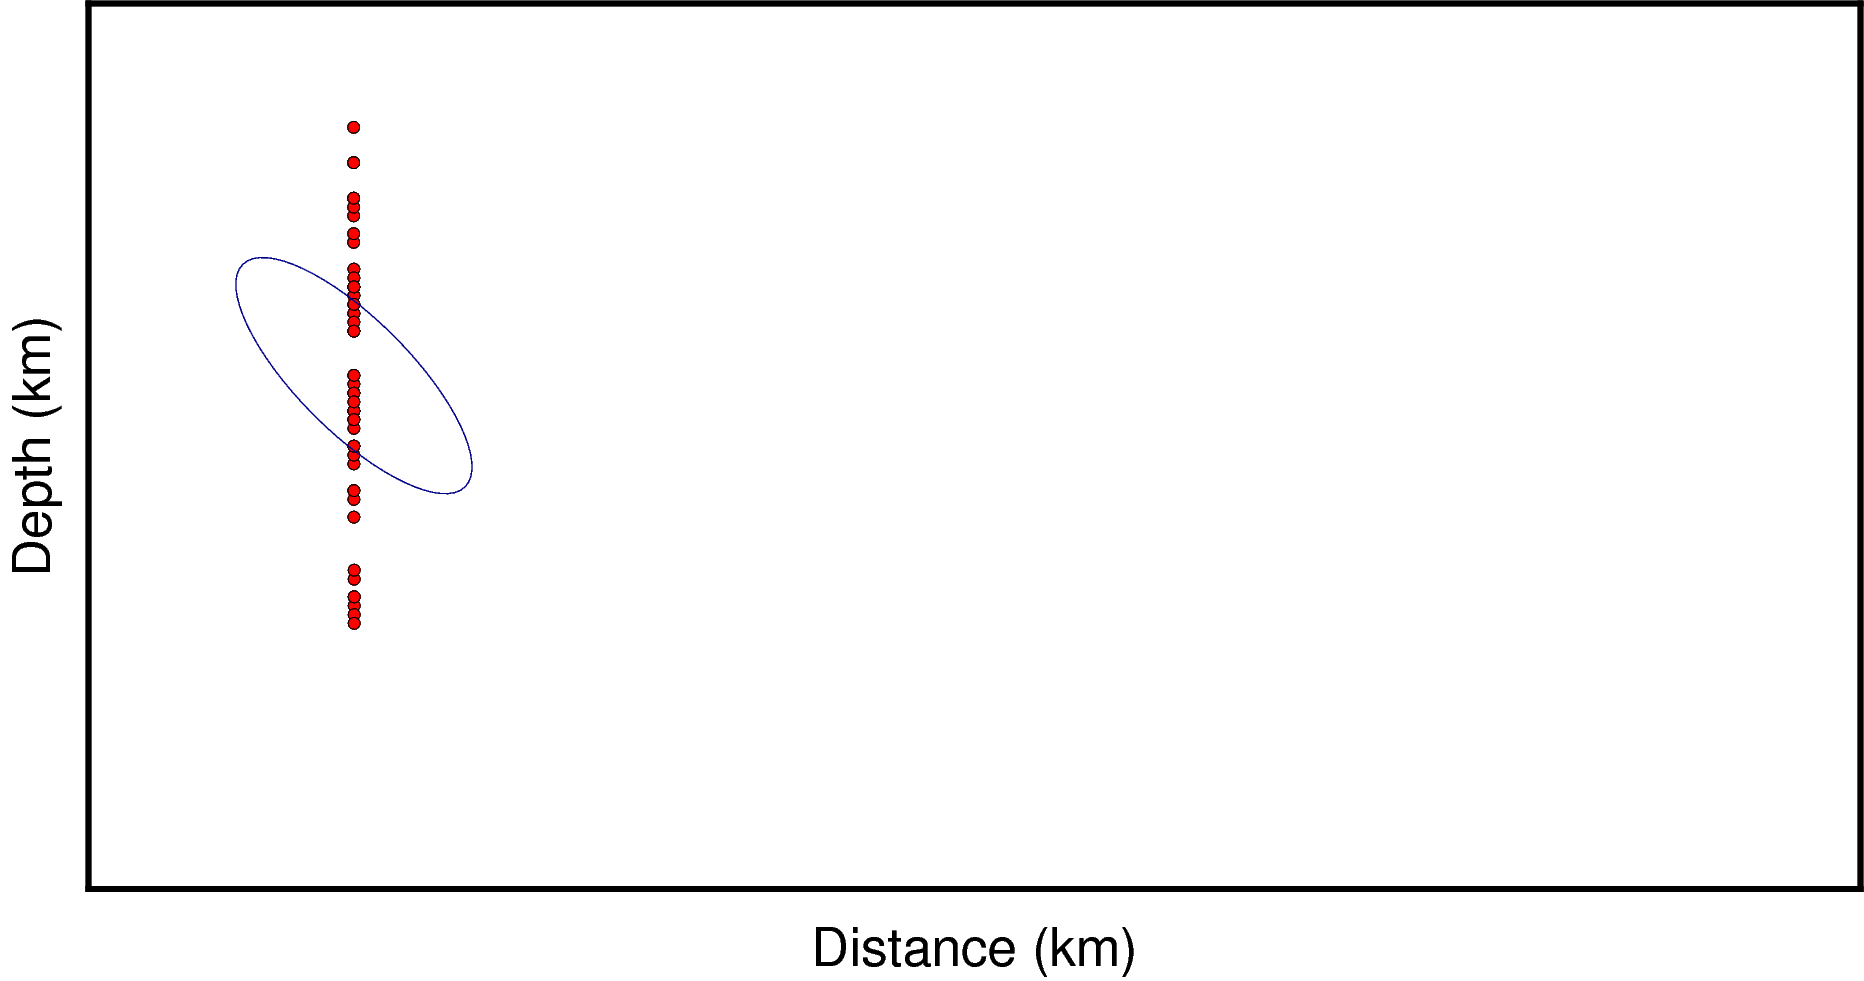

In [35]:
fig = pygmt.Figure()
region = [910,920,6.8,6.9]
# region = [0,region_length_max,-10,Z.max()]
fig.basemap(region=region, frame=["WrSt","xaf+lDistance (km)", "yaf+lDepth (km)","a100f50"], projection="X15/-7.5" )
# for i in range(len(X)):
#     print(i)
x = X[0,:]
y = Y[0,:]
z = Z[0,:]

con = np.column_stack((x,y,z))
proj_lon = pygmt.project(data=con,
                    center=f'{minlon}/{minlat+(maxlat-minlat)/2}',
                    endpoint=f'{maxlon}/{minlat+(maxlat-minlat)/2}',
                    unit=True,
                    length='w',
                    convention='p')
x_proj = proj_lon.to_numpy().flatten()
# see x
# https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
# https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
# basis code of drawing ellipse error

cov = np.cov(x_proj,z)
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)

eig_val, eig_vec = np.linalg.eig(cov)
eig_val_sqrt = np.sqrt(eig_val)
theta =np.rad2deg(np.arccos(eig_vec[0, 0]))

# variance plot
# variance.write(str(np.var(x*111.11))+'\t'+str(np.var(y*111.11))+'\t'+str(np.var(z*111.11))+'\n')

# plot
fig.plot(x=x_proj.tolist(),y=z.tolist(),fill='red',style="c0.1c", pen="0.1p,black")
fig.plot(x=x_proj.mean(), y=z.mean(), style=f"e{45}/{2*ell_radius_x}/{2*ell_radius_y}", fill=None, pen="0.2p,darkblue")
fig.show()

In [33]:
theta

177.8104981838615